In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")


In [13]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred):
    g=confusion_matrix(y_true,y_pred)
    sns.heatmap(data=g,xticklabels=Ptypes_value.index.sort_values(),yticklabels=Ptypes_value.index.sort_values(),cbar=False,annot=True,cmap="Blues",fmt="g",linewidths=.5,linecolor="black")
    

In [12]:
data=pd.read_csv("E:\piere\Documentos\Portafolio\Oil Play Prediction\Data\processed\data_ready.csv")

In [22]:
X=data.drop("TARGET",axis=1)
y=data["TARGET"]

In [23]:
pt=PowerTransformer()
X=pt.fit_transform(X)

In [24]:
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=.3, random_state=42)

In [25]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
y_pred=rf.predict(X_test)

In [28]:
report(y_test,y_pred)

              precision    recall  f1-score   support

          A1       0.73      0.49      0.58       332
         AP1       0.67      0.27      0.39        22
          B1       1.00      1.00      1.00         4
          F1       0.82      0.63      0.71       571
          F2       0.95      0.99      0.97       283
          P1       0.84      0.95      0.89      2634
          R1       1.00      0.05      0.09        66
          S1       0.95      0.38      0.55        52
          X1       1.00      0.14      0.25         7
          X2       0.79      0.55      0.65        20

    accuracy                           0.84      3991
   macro avg       0.87      0.55      0.61      3991
weighted avg       0.84      0.84      0.82      3991



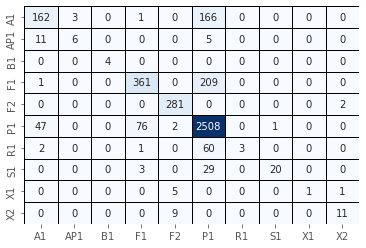

In [29]:
matrix(y_test,y_pred)